# process_backtest
> process_backtest system notes.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [zts, system, backtest]

In [4]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))



In [5]:
mm("""
graph LR;
    A--> B & C & D;
    B--> A & E;
    C--> A & E;
    D--> A & E;
    E--> B & C & D;
""")

In [ ]:
mm("""
graph LR;
    A--> B & C & D;
    B--> A & E;
    C--> A & E;
    D--> A & E;
    E--> B & C & D;
""")

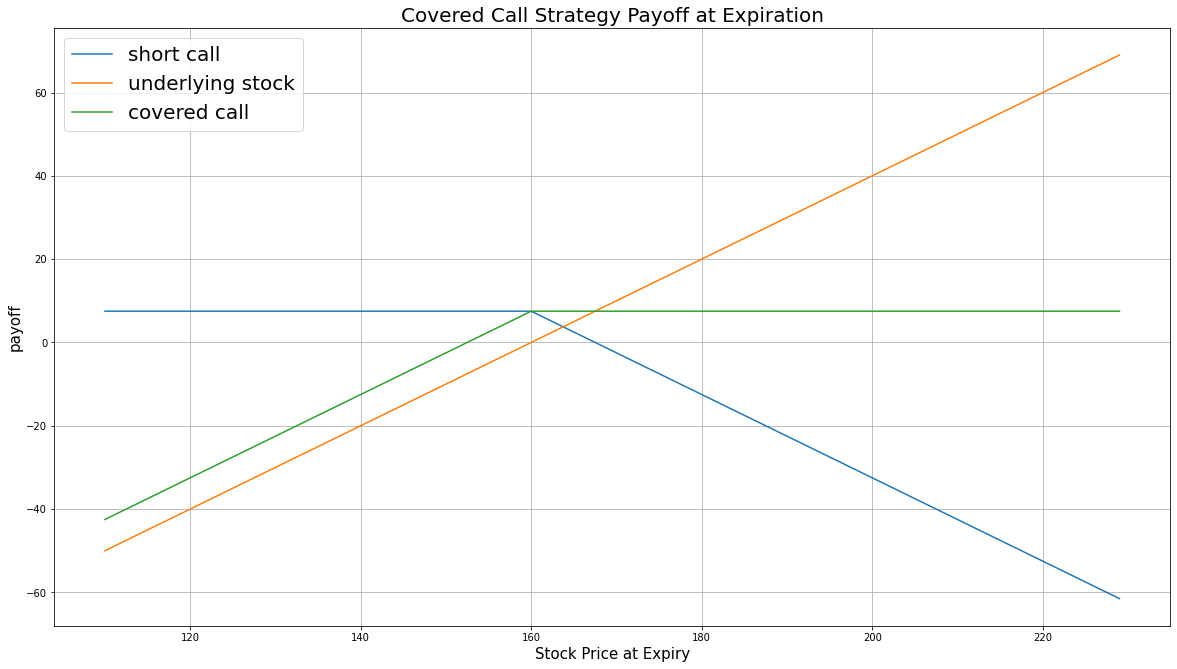

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#  %pylab inline
price = np.arange(110,230,1) # the stock price at expiration date
strike = 160 # the strike price
premium = 7.5 # the option premium
# the payoff of short call position
payoff_short_call = [min(premium, -(i - strike-premium)) for i in price]
# the payoff of long stock postion
payoff_long_stock = [i-strike for i in price]
# the payoff of covered call
payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
plt.figure(figsize=(20,11))
plt.plot(price, payoff_short_call, label = 'short call')
plt.plot(price, payoff_long_stock, label = 'underlying stock')
plt.plot(price, payoff_covered_call, label = 'covered call')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Covered Call Strategy Payoff at Expiration',fontsize = 20)
plt.grid(True)

In [44]:
def short_call(premium: float, strike: float, uprices: list[float], multiplier=1):
    payoff = [min(premium*multiplier, -(i - strike-premium)*multiplier) for i in price]
    label = "short call"
    return { 'payoff': payoff, 'label': label}

In [45]:
def long_underlying(strike: float, uprices: list[float], multiplier=1):
    payoff = [(i-strike)*multiplier for i in price]
    label = "long underlying"
    return { 'payoff': payoff, 'label': label}

In [46]:
def plot_strategy_payoff(name: str, legs: {list, str}):
    payoffs = [leg['payoff'] for leg in legs]
    strategy_payoff = np.sum(payoffs,axis=0)

    plt.figure(figsize=(20,11))
    for leg in legs:
        plt.plot(uprices, leg['payoff'], label=leg['label'])
    plt.plot(uprices, strategy_payoff, label=name)
    
    plt.legend(fontsize = 20)
    plt.xlabel('Underlying Price at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title(f'{strategy_name} Strategy Payoff at Expiration',fontsize = 20)
    plt.grid(True)

In [47]:
call_price = 10

# prices of underlying at expiration date
uprices = np.arange(110,230,1)

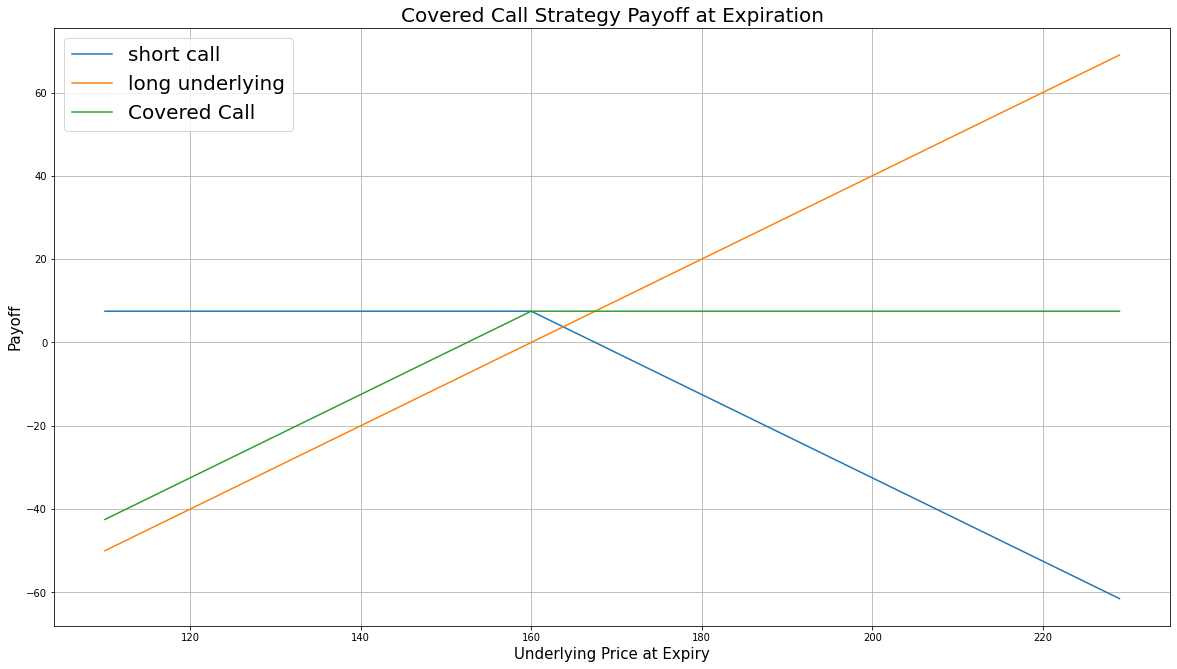

In [51]:
strategy_name = 'Covered Call'
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices))
legs.append(long_underlying(strike = 160, uprices = uprices))

plot_strategy_payoff(strategy_name, legs)

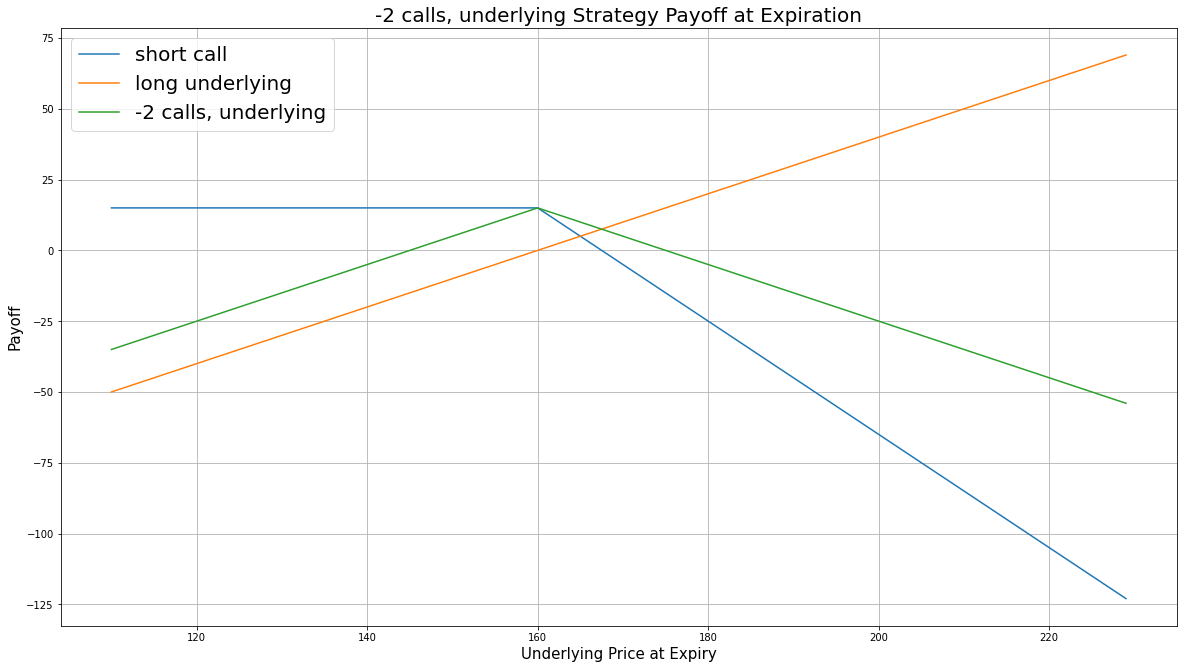

In [53]:
strategy_name = '-2 calls, underlying'
legs = []
legs.append(short_call(strike = 160, uprices = uprices, multiplier=2))
legs.append(long_underlying(strike = 160, uprices = uprices))

plot_strategy_payoff(strategy_name, legs)

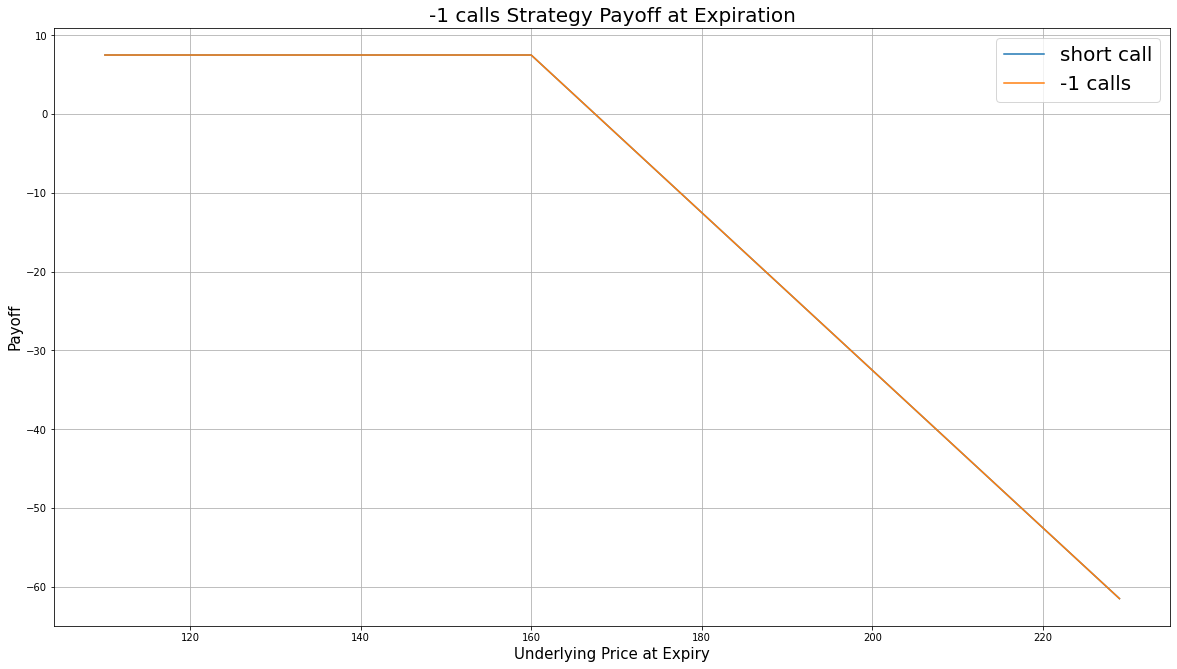

In [54]:
strategy_name = '-1 calls'
legs = []
legs.append(short_call(strike = 160, uprices = uprices, multiplier=1))

plot_strategy_payoff(strategy_name, legs)

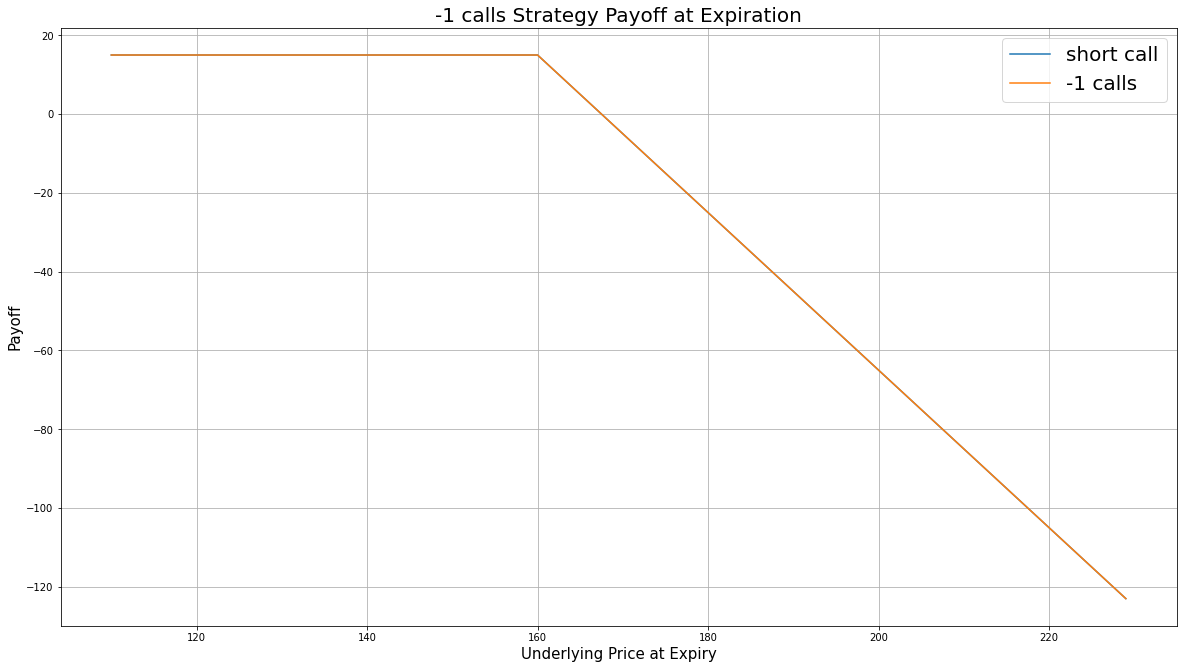

In [55]:
strategy_name = '-1 calls'
legs = []
legs.append(short_call(strike = 160, uprices = uprices, multiplier=2))

plot_strategy_payoff(strategy_name, legs)